<a href="https://colab.research.google.com/github/minoring/Machine-Learning-Example/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Manine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minoring","key":"877d61d0cbb1e712d00118114ddcd82f"}'}

In [0]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.5MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.26MB/s]


In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [13]:
train_df.head()
# Categorical Data: Survived, Sex, Embarked/PClass
# Numerical Data:   SibSp, Parch/Age, Fare
# Ticket, Cabin은 숫자 알파벳 합쳐져서 특성 찾기 어려움. 수정을 통해 원하는걸 얻어내자.
# Name은 오타가 있을 가능성이 있음. 특별한 정보 얻어올수도있는데(e.g. PhD), 어려울것 같다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_df.tail()
# 데이터에서 빈값은 반드시해결해야함 (추후 정보를 점검하며 찾는다.)
# 수치 -> 최소값, 중앙값, 평균 범주 -> 최빈값 등으로 채움

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
# 데이터는 어떤 형태로 들어오나는 매우 중요함
# 범주형 데이터도 수치로 들어올 수 있고, 머신러닝 함수들에 입력하기 전에 좋은 형태로 바꾸어야힘
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [19]:
# 수치형 데이터 분포
# 데이터에 대한 분포를 살피는 것은 데이터에 대한 이해를 높임.
# 891명의 샘플로 총 40%가 데이터로 주어짐
# Survived는 0과 1로 이루어진 범주형 데이터
# 대부분의 승객은 (>75%) 부모 또는 자식과 타지 않았음
# 30% 승객은 형제자매나 배우자와 함께 탔습니다.
# 요금의 경우, 매우적은 수의 승객이 512$보다 많이 지불했음
# 나이가 많은 승객(65-80)의 수는 1% 미만임

# .describe()를 통해 통계를 살필 수 있고,
# include=all 세팅을 통해 범주형 데이터도 분석 가능
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Farrell, Mr. James",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
# 위에서 알수 있는것
# Name은 모두 다르다
# 성별은 577/891로 남자가 65%를 차지한다
# 호실(Cabin) 은 양도 적고 중복도 많이보임. 일부 손님들이 호실을 공유한것으로 보임
# 승선(Embark)은 총 3개의 종류가 있고, S가 제일 많다
# Ticket은 중복이 매우 적다.

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Farrell, Mr. James",male,1601,G6,S
freq,1,577,7,4,644


In [0]:
## 가정을 기반을한 데이터 분석

# 지금까지 한 기초적인 데이터 분석과 더불어 다음과 같은 가정을 더 할수있음.
# 가정은 후에 몇 작업을 통해 더 검증해야 할 수 도 있음

## Correlating.
# 우리는 각 특성이 생존 여부에 미치는 영항을 알고싶다.
# 프로젝트를 시작하며 초안을 만들고, 후에 모델링된 상관관계가 일치하는지 확인

## Completing
# Age는 분명 생존 여부와 관계가 있는 특성이기에 채워야 함
# Embarked도 생존 여부와 관계가 있다고 생각되고,다른 특성과 연관이 있으므로 채워넣어야

# Correcting
# Ticket의 경우에는 22%나 중복이되었고, 생존여부와 관계가 없다고 생각되니 특성에서 제거
# Cabin은 훈련 데이터와 테스트 데이터 모두 너무많은 NULL을 가지고 있으니 제외
# PassengerId는 훈련 데이터에서 생존여부와 관계없으니 제거
# Name은 형식이 다양하고, 생존여부와 직결된 관계가 없으니 제거해도 될 것 같다

## Creating
# Family라는 특성을 Parch와 SibSp를 합친 값으로 만듬
# Name 특성을 수정하여 Title이라는 특성을 만들것임
# Age특성을 수치-연속성 데이터에서 Age bands, 즉 나이대라는 범주형 데이터로 만듬
# Fare 범위로 새로운 특성을 만들어 분석을 도움

# Classifying
# 기존 디스크립션에 서술된 정보를 통해 가정을 할 수 있음
# Women(Sex = female)이 더 많이 생존
# Child(Age < ?) 이 많이 생존
# The upper-class passenger (Pclass=1)이 더 많이 생존

In [27]:
# Pivoting features로 분석하기
# 위의 관측과 예측들은 빠르고 간단하게 확인가능
# 지금은 NULL이나, NaN등 빈 값이 없는 특성값에 대해서만 할수있음
# 여기서는 Pclass, Sex, Sibsp and Parch 특성에 대해 살펴봄

# Pclass: Pclass=1인 승객에 대해서 생존 확률이 0.5보다 높은 것을 알 수 있음 -> 모델 특성
# Sex: 실제 여성 생존확률이 74%로 높은수치
# SibSp and Parch: 두 특성은 상관관계를 찾기 힘듬.
# 이런경우 특성을 합쳐 새로운 성질을 찾아내야 함

(train_df[['Pclass', 'Survived']]
        .groupby(['Pclass'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
(train_df[['Sex', 'Survived']]
        .groupby(['Sex'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [31]:
(train_df[['SibSp', 'Survived']]
        .groupby(['SibSp'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
(train_df[['Parch', 'Survived']]
        .groupby(['Parch'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


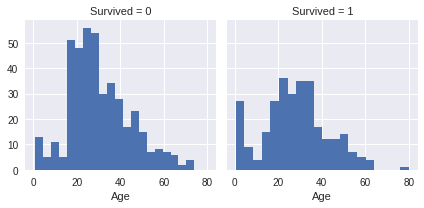

In [34]:
## 데이터 시각화를 통한 분석

# 수치형 특성의 상관관계
# 히스토그램 차트 -> 연속형 수치형 변수 분석에 유용
# 연속형 데이터를 사용자 지정 범위에 따라 나타냄

# 영아 (Age <=4 는 생존확률이 매우 높음)
# 최고력령 승객은 살았음  Age = 80
# 15 ~ 25세에 사람들은 생존하지 못한 사람이 많음
# 대부분의 승객은 15 - 35 dlek.

# Decision
# 이 간단한 분석으로 우리는 다음과 같은 가정을 할 수 있음
# Age 특성은 모델에 필요함
# Age에서 Null은 채워야함
# 나이를 그룹화 해야함 (연속형 -> 범주형)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

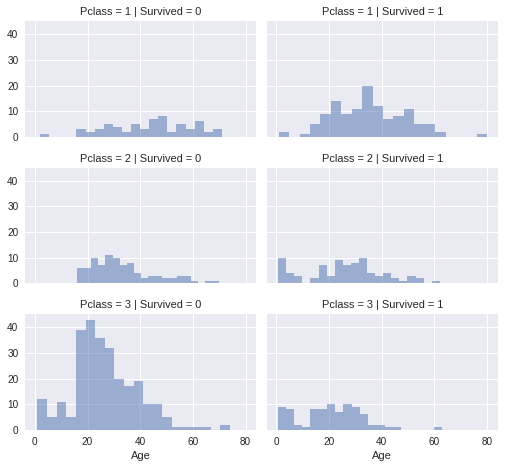

In [37]:
# 수치형과 서수형 특성의 상관관계
# 1개의 그래프로도 여러 특성을 조합하여 상관관계를 해볼 수 있음
# 이는 수치형, 범주형 특성에서 수치를 가지고 있는 데이터에서 가능

# Observation
# Pclass=3인 승객이 가장많음
# Pclass 2, PClass=3에서 영아 승객은 대부분 생존
# PClass 승객은 대부분 생존
# PClass 에 따라 승객의 나이 분포는 다름

# Devision
# Pclass는 모델에 필요한 특성

grid = sns.FacetGrid(train_df,
                     col='Survived',
                     row='Pclass',
                     size=2.2, 
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


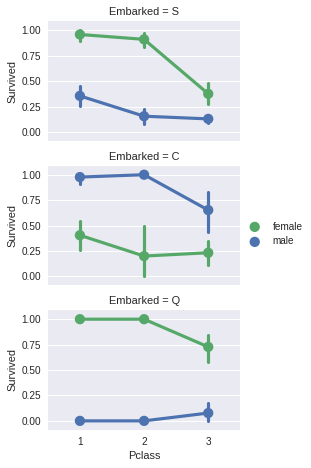

In [39]:
## 범주형 특성의 상관관계

# Observation
# 여성 승객이 높은율로 생존
# 예외적으로 Embarked=C인 남성의 생존비율이 높음
# 이는 Pclass와의 상관관계일수 있으며, 특성들은 꼭 Survived와 직접적으로 연관될 필요는 없음

# Devision
# Sex 특성은 모델에 필요함
# Embarked 특성은 빈 부분을 채워야 하고, 모델에 있어 필요한 특성임
grid = sns.FacetGrid(train_df,
                     row='Embarked',
                     size=2.2,
                     aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


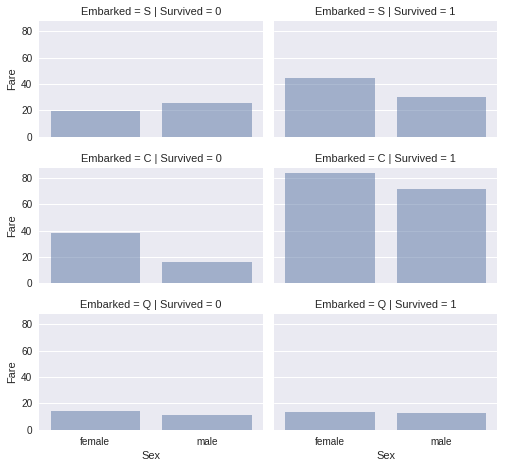

In [41]:
# 범주형 특성과 수치형 특성의 상관관계

# 요금을 높게 낸 승객은 생존율이 높았다
# 생존율과 Embarked의 상관관계

# Decision
# Fare 특성의 분류를 고려
grid = sns.FacetGrid(train_df,
                     row='Embarked',
                     col='Survived',
                     size=2.2,
                     aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()